In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train = pd.read_csv("MSFT.csv")
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,247.399994,257.910004,245.729996,253.919998,251.852966,33339700
1,2023-03-14,256.750000,261.070007,255.860001,260.790009,258.667053,33620300
2,2023-03-15,259.980011,266.480011,259.209991,265.440002,263.279175,46028000
3,2023-03-16,265.209991,276.559998,263.279999,276.200012,273.951599,54768800
4,2023-03-17,278.260010,283.329987,276.320007,279.429993,277.155304,69527400


In [4]:
train_set = dataset_train.iloc[: , 1 : 2]

In [5]:
print(train_set)

           Open
0    247.399994
1    256.750000
2    259.980011
3    265.209991
4    278.260010
..          ...
245  413.440002
246  413.959991
247  402.970001
248  406.119995
249  407.959991

[250 rows x 1 columns]


In [8]:
print(train_set.shape)

(250, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(train_set)
scaled_training_set

array([[0.        ],
       [0.05399634],
       [0.07264967],
       [0.10285283],
       [0.17821677],
       [0.17082477],
       [0.15869722],
       [0.15015015],
       [0.17636872],
       [0.17232615],
       [0.19115272],
       [0.1639525 ],
       [0.18225916],
       [0.21269356],
       [0.20980605],
       [0.22591819],
       [0.23001857],
       [0.22204904],
       [0.20680293],
       [0.24145297],
       [0.2214715 ],
       [0.21592755],
       [0.20899747],
       [0.22869026],
       [0.24561098],
       [0.25508207],
       [0.22285744],
       [0.218584  ],
       [0.21719805],
       [0.20033496],
       [0.18543552],
       [0.28470788],
       [0.28049206],
       [0.32692316],
       [0.34401713],
       [0.34857943],
       [0.34199584],
       [0.33980131],
       [0.33679837],
       [0.36226617],
       [0.34996538],
       [0.35354585],
       [0.36209292],
       [0.36469157],
       [0.35631792],
       [0.36053356],
       [0.3747402 ],
       [0.387

In [25]:
X_train = []
y_train = []

n = len(scaled_training_set)
train_size = int(n * 0.8)

for i in range(30, train_size):
    X_train.append(scaled_training_set[i - 30:i, 0])
    y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [26]:
print(X_train.shape)
print(y_train.shape)

(170, 30)
(170,)


In [29]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [30]:
regressor = Sequential()

regressor.add(LSTM(units=50 , return_sequences = True , input_shape = (X_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50 , return_sequences = True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50 , return_sequences = True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [31]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')
regressor.fit(X_train , y_train , epochs=10 , batch_size = 16 )

Epoch 1/10
11/11 [==============================] - 6s 22ms/step - loss: 0.0833
Epoch 2/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0162
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0097
Epoch 4/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0106
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0099
Epoch 6/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0094
Epoch 7/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0092
Epoch 8/10
11/11 [==============================] - 0s 21ms/step - loss: 0.0086
Epoch 9/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0078
Epoch 10/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0082


In [46]:
dataset_test = pd.read_csv("MSFT.csv")
actual_stock_price = dataset_test.iloc[:, 1 : 2].values

In [47]:
X_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i - 30: i, 0])

# Zero-padding
max_length = max(len(x) for x in X_test)
X_test_padded = [np.pad(x, (0, max_length - len(x)), 'constant') for x in X_test]

X_test = np.array(X_test_padded)
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))


In [48]:
predicted_price = regressor.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

7/7 [==============================] - 0s 9ms/step


Text(0.5, 0, 'Stock Price')

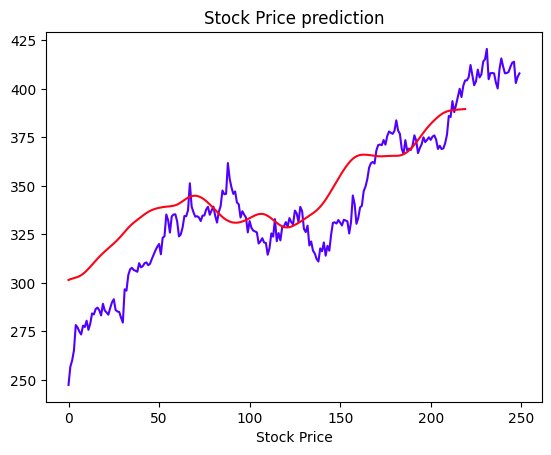

In [53]:
plt.plot(actual_stock_price , color = "#5100FF" , label = "Actual Stock Price") 
plt.plot(predicted_price , color = "#FC0317" , label = "Predicted Stock Price")
plt.title("Stock Price prediction")
plt.xlabel("Time")
plt.xlabel("Stock Price")